In [1]:
from sklearn.datasets import make_circles, make_moons, make_blobs
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
from cvxopt import matrix
from cvxopt import solvers
from numpy import linalg as LA

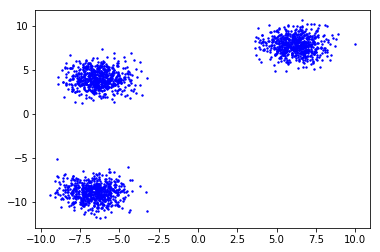

In [11]:
X, y = make_blobs(n_samples=2000, centers=3)
plt.scatter(X[:, 0], X[:, 1], c="blue", s=2)
y[y == 0] = -1

In [12]:
def gaussian_pdf(x, mu, delta):
    n = x.shape[0]
    return np.exp(-1/2 * np.dot(np.dot((x-mu).T, np.linalg.inv(delta)), x-mu)) / ((2*np.pi)**(n/2) * np.linalg.det(delta)**(1/2))

In [13]:
def likelihood(X, centers, deltas, priors):
    l = 0
    for x in X:
        p = 0
        for i in range(centers.shape[0]):
            p += gaussian_pdf(x, centers[i], deltas[i]) * priors[i]
        l += np.log(p)
    return l

In [14]:
d = 2
num = 3
centers = []
deltas = []
priors = []
# need better initialization
for i in range(num):
    centers.append(np.random.random_sample(d))
    deltas.append(np.eye(d) * np.random.random_sample())
    priors.append(np.random.random_sample(1))
centers = np.array(centers)
deltas = np.array(deltas)
priors = np.array(priors)
max_iter = 150

for it in range(max_iter):
    # E step
    if it % (max_iter/10) == 0:
        print(likelihood(X, centers, deltas, priors))
    w = []
    for x in X:
        pdf = []
        for i in range(len(centers)):
            pdf.append(gaussian_pdf(x, centers[i], deltas[i]) * priors[i])
        w.append(np.array(pdf).reshape(len(pdf)))
    w = np.array(w)
    w = np.divide(w, np.sum(w, axis=-1).reshape(w.shape[0], 1))

    # M step
    priors = np.sum(w, axis=0) / w.shape[0]
    mus = []
    dels = []
    for i in range(num):
        mu = np.sum(np.multiply(w[:, i].reshape(w.shape[0], 1), X), axis=0) / np.sum(w[:, i])
        mus.append(mu)
        delta = np.zeros((d, d))
        for j in range(X.shape[0]):
            delta += np.multiply(w[j, i], np.outer(X[j]-centers[i], X[j]-centers[i])) / np.sum(w[:, i])
        dels.append(delta)
    centers = np.array(mus)
    deltas = np.array(dels)

[-119651.72210834]
-7827.792020809257
-7827.792020809258
-7827.792020809258
-7827.792020809258
-7827.792020809258
-7827.792020809258
-7827.792020809258
-7827.792020809258
-7827.792020809258


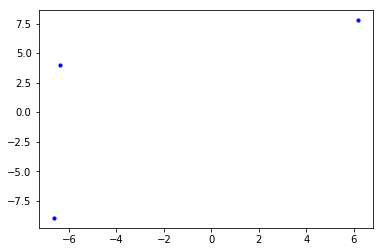

In [15]:
plt.scatter(centers[:, 0], centers[:, 1], c="blue", s=10)

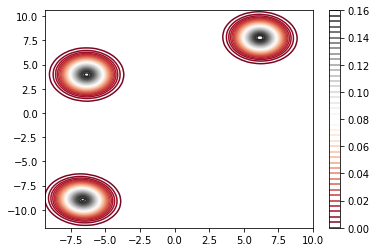

In [16]:
for i in range(num):
    x = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
    y = np.linspace(min(X[:, 1]), max(X[:, 1]), 100)
    density = np.zeros((len(x), len(y)))
    for (xpos, xidx) in zip(x, range(len(x))):
        for (ypos, yidx) in zip(y, range(len(y))):
            pos = np.array([xpos, ypos])
            density[yidx, xidx] = gaussian_pdf(pos, centers[i], deltas[i])

    Xd, Yd = np.meshgrid(x, y)
    plt.contour(x, y, density, 50, cmap='RdGy')
#plt.axis(aspect='image')
plt.colorbar();